In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
#Definición de unidades
    #Escalas
um=1e-6
mm=1e-3
nm=1e-9
    #Tamaño imagen
N=200
M=200
    #longitud de onda
w_length=632*nm
    #Tamaño de pixel
dx=dy=1*um #equivalencia con el mundo físico

In [3]:
#Espectro angular.
def A_apx(U_f,dx_f,dy_f,z_f,wave_length):
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    
    N_f,M_f=np.shape(U_f) #The shape of an array is the number of elements in each dimension
    x=np.arange(-int(M_f/2),int(M_f/2),1) #arreglo desde -la mitad del número de elementos que tenga cada dimensión
    y=np.arange(-int(N_f/2),int(N_f/2),1) #hasta la mitad de número de elementos en cada dimensión, con pasos de a 1.
    X,Y=np.meshgrid(x,y) #Return coordinate matrices from coordinate vectors.
    
     #dimensionando
    fX=X*(1/(M_f*dx_f)) 
    fY=Y*(1/(N_f*dy_f))
    
    k= 2*np.pi/wave_length
    C1 = 1j*z_f*k

    matriz = np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))

    freq_p = U_freq*matriz
    plt.figure()
    plt.imshow(np.angle(
    matriz))
        
    plt.show()
    
    return freq_p

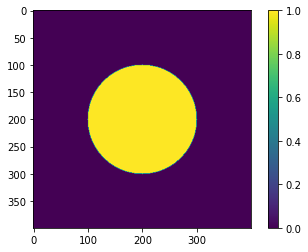

In [4]:
mask2 = np.zeros((400,400),dtype="uint8")
coordy=int((400,400)[0]/2)
coordx=int((400,400)[1]/2)

cv2.circle(mask2,(coordy,coordx),100,1,-1)
plt.figure()
plt.imshow(mask2)
plt.colorbar()
plt.show()

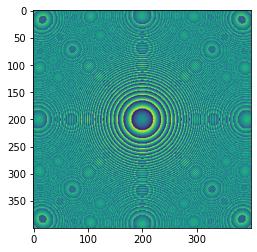

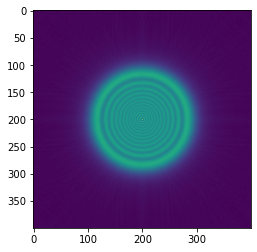

In [5]:
z2=632*um
A_prop=A_apx(mask2,dx,dy,z2,w_length)

dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(
    np.abs(dodoco_prop)
        )
plt.show()